In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
nyc_taxi_df = pd.read_csv('nyc_cleaned.csv')
nyc_taxi_df.head()

,passenger_count,trip_distance,payment_type,fare_amount,duration
0,1,1.20,Card,6.0,4.800000
1,1,1.20,Card,7.0,7.416667
2,1,0.60,Card,6.0,6.183333
3,1,0.80,Card,5.5,4.850000
4,1,0.03,Cash,2.5,0.883333


In [4]:
nyc_taxi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2468583 entries, 0 to 2468582
Data columns (total 5 columns):
 #   Column           Dtype  
---  ------           -----  
 0   passenger_count  int64  
 1   trip_distance    float64
 2   payment_type     object 
 3   fare_amount      float64
 4   duration         float64
dtypes: float64(3), int64(1), object(1)
memory usage: 94.2+ MB


In [5]:
nyc_taxi_df.describe()

,passenger_count,trip_distance,fare_amount,duration
count,2.468583e+06,2.468583e+06,2.468583e+06,2.468583e+06
mean,1.965640e+00,3.006961e+00,1.297947e+01,1.475669e+01
std,1.463491e+00,2.223115e+00,6.281237e+00,7.404872e+00
min,1.000000e+00,1.000000e-02,1.000000e-02,1.666667e-02
25%,1.000000e+00,1.380000e+00,8.000000e+00,9.033333e+00
50%,1.000000e+00,2.350000e+00,1.150000e+01,1.401667e+01
75%,2.000000e+00,3.970000e+00,1.650000e+01,1.970000e+01
max,6.000000e+00,1.127000e+01,3.100000e+01,3.635000e+01


### Exploratory Data Analysis to understand relation between different factors and fare amount

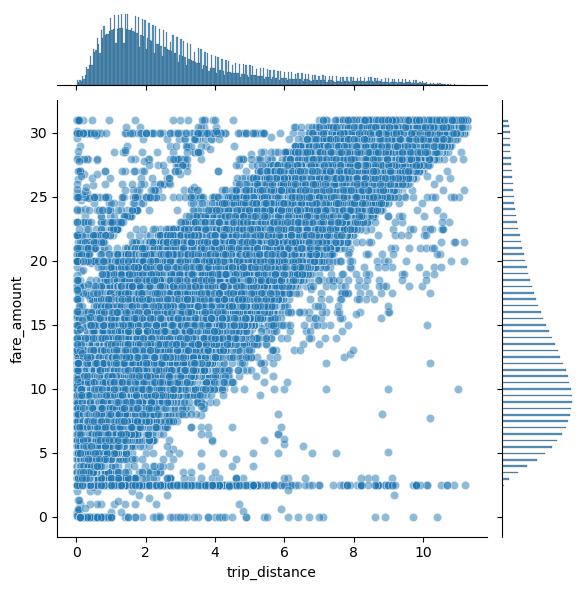

In [6]:
# trip distance vs fare amount
sns.jointplot(x='trip_distance', y='fare_amount', data=nyc_taxi_df, alpha=0.5)

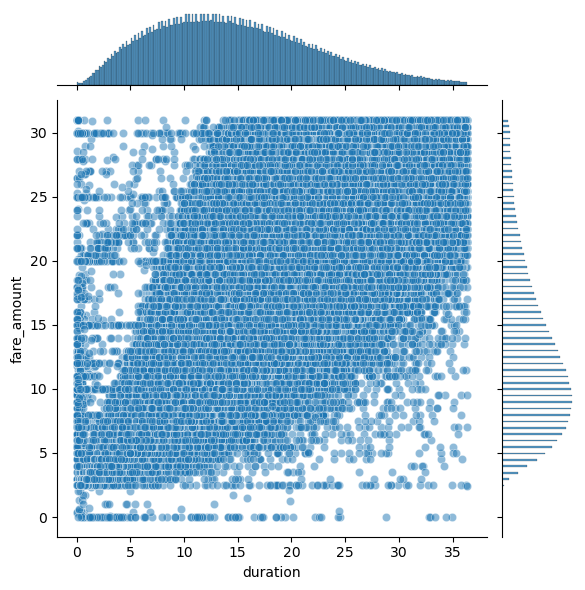

In [7]:
# trip duration vs fare amount
sns.jointplot(x='duration', y='fare_amount', data=nyc_taxi_df, alpha=0.5)

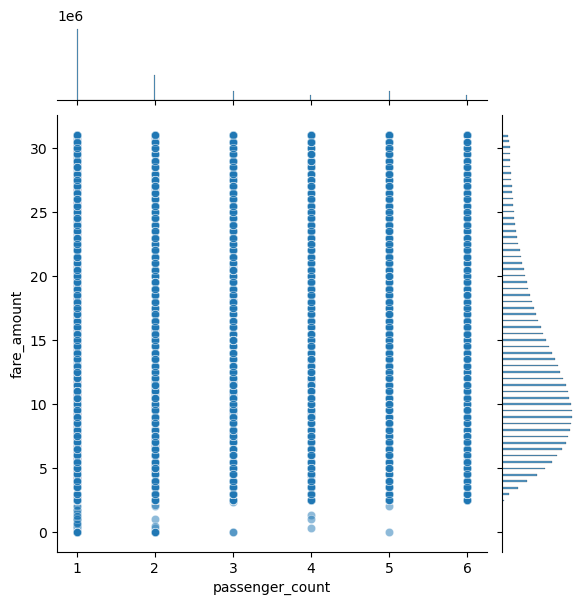

In [8]:
# trip duration vs fare amount
sns.jointplot(x='passenger_count', y='fare_amount', data=nyc_taxi_df, alpha=0.5)

From the above joint plots we can see that passenger count doesn't have a significance relation with fare amount whereas trip duration and trip distance do have significant relation with fare amount so we'll consider them for forecasting the fare amount. 

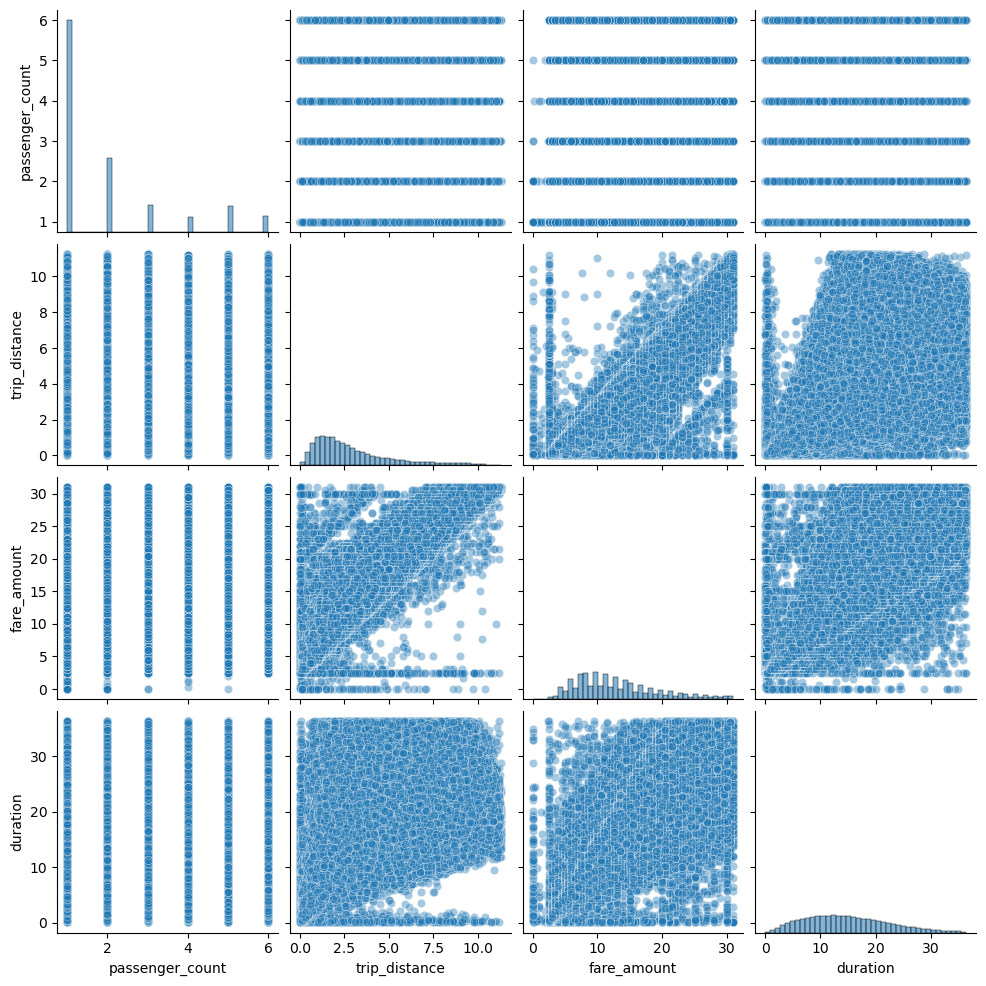

In [9]:
sns.pairplot(nyc_taxi_df, 
             kind='scatter', 
             plot_kws={'alpha':0.4}, 
             diag_kws={'alpha':0.55, 'bins':40})

## Visualizing the linear relationship between fare amount and trip duration and trip distance

In [17]:
sampled_data = nyc_taxi_df.sample(n=100000, random_state=1)  # random_state ensures reproducibility

sampled_data.head()

,passenger_count,trip_distance,payment_type,fare_amount,duration
2227897,2,1.36,Card,11.0,16.066667
1681983,1,2.18,Cash,9.5,10.716667
2350721,5,2.38,Card,10.0,8.916667
1231849,4,0.87,Card,6.0,6.983333
832396,5,0.60,Card,5.0,4.466667


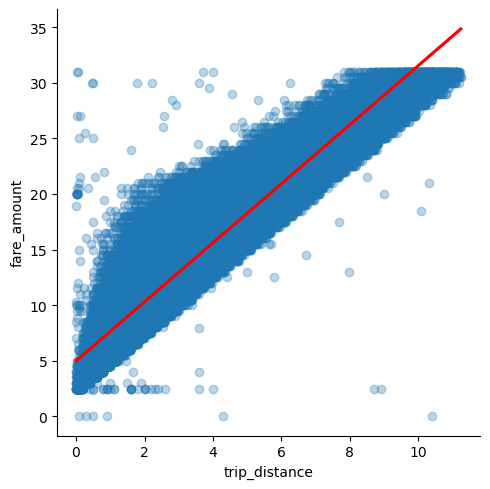

In [19]:
# Trip Distance vs fare Amount
sns.lmplot(x='trip_distance', 
           y='fare_amount', 
           data=sampled_data,
           scatter_kws={'alpha':0.3},
           line_kws={'color': 'red'})

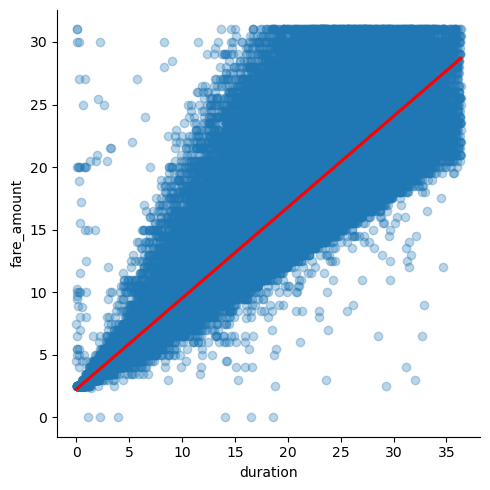

In [20]:
# Trip Duration vs fare Amount
sns.lmplot(x='duration', 
           y='fare_amount', 
           data=sampled_data,
           scatter_kws={'alpha':0.3},
           line_kws={'color': 'red'})

## Splitting the Data

In [22]:
from sklearn.model_selection import train_test_split

X = nyc_taxi_df[['trip_distance', 'duration']]
y = nyc_taxi_df['fare_amount']

In [23]:
X.head()

,trip_distance,duration
0,1.20,4.800000
1,1.20,7.416667
2,0.60,6.183333
3,0.80,4.850000
4,0.03,0.883333


In [24]:
y.head()

0    6.0
1    7.0
2    6.0
3    5.5
4    2.5
Name: fare_amount, dtype: float64

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

## Training the Model with multivariable regression using Scikit Learn

In [26]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [28]:
lm.coef_

array([1.87494046, 0.35844637])

In [29]:
# r squared
lm.score(X, y)

0.9869679575988434

In [30]:
# The coefficients in a dataframe
cdf = pd.DataFrame(lm.coef_,X.columns,columns=['Coef'])
print(cdf)

                   Coef
trip_distance  1.874940
duration       0.358446


## Training the model with multivariable regression using OLS

In [32]:
import statsmodels.api as sm

X = sm.add_constant(X_train)
model = sm.OLS(y_train, X)
model_fit = model.fit()
print(model_fit.summary())

                            OLS Regression Results                            
Dep. Variable:            fare_amount   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                 6.506e+07
Date:                Mon, 26 Aug 2024   Prob (F-statistic):               0.00
Time:                        16:11:24   Log-Likelihood:            -1.8826e+06
No. Observations:             1728008   AIC:                         3.765e+06
Df Residuals:                 1728005   BIC:                         3.765e+06
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             2.0531      0.001   1682.065

## Predicting test data

In [33]:
predictions = lm.predict(X_test)

C:\Users\sawan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Fare Amount vs. Model Predictions')

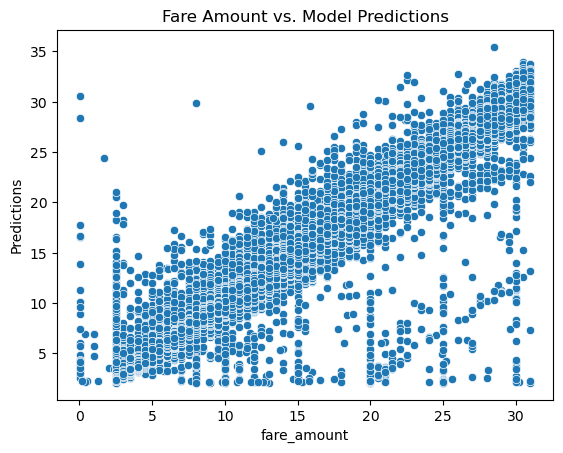

In [34]:
# Scatter plot of actual values of y vs predicted values.
sns.scatterplot(y_test, predictions)
plt.ylabel('Predictions')
plt.title('Fare Amount vs. Model Predictions')

## Evaluation of the model 

In [35]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

print('Mean Absolute Error:',mean_absolute_error(y_test, predictions))
print('Mean Squared Error:',mean_squared_error(y_test, predictions))
print('Root Mean Squared Error:',math.sqrt(mean_squared_error(y_test, predictions)))

Mean Absolute Error: 0.4477263680972909
Mean Squared Error: 0.5066156658924799
Root Mean Squared Error: 0.7117693909494001


C:\Users\sawan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='fare_amount', ylabel='Density'>

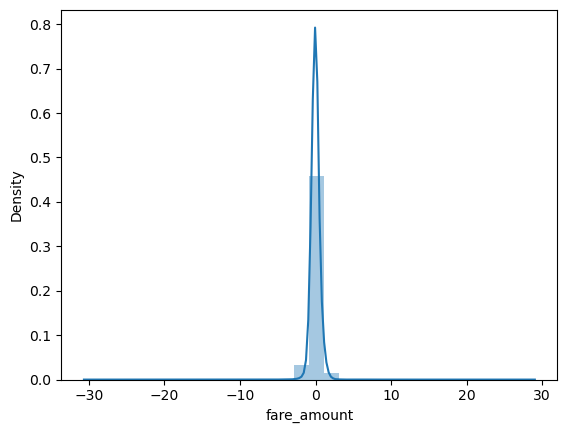

In [36]:
residuals = y_test-predictions
sns.distplot(residuals, bins=30)

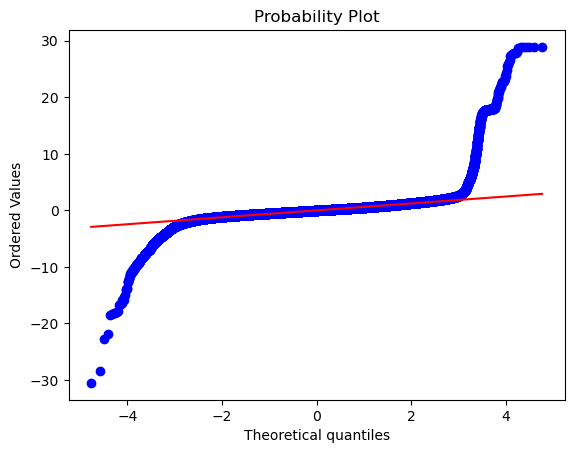

In [38]:
import pylab 
import scipy.stats as stats

stats.probplot(residuals, dist="norm", plot=pylab)
pylab.show()